In [29]:
import urllib2
import time
import json
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

%matplotlib inline  


In [59]:
calendars = pd.read_json('/Users/Elena/Desktop/AirBnb/AirbnbScrape/calendars.json')
calendars

,10057577.0,10102023.0,10122428.0,10133274.0,10212453.0,10334770.0,10418854.0,10527364.0,10552237.0,10627716.0,...,9790421.0,9826392.0,9857572.0,9885963.0,9887215.0,990668.0,9917358.0,9926796.0,9933886.0,9972882.0
calendar_months,"[{u'name': u'March', u'condition_ranges': [{u'...","[{u'name': u'March', u'condition_ranges': [{u'...","[{u'name': u'March', u'condition_ranges': [{u'...","[{u'name': u'March', u'condition_ranges': [{u'...","[{u'name': u'March', u'condition_ranges': [{u'...","[{u'name': u'March', u'condition_ranges': [{u'...","[{u'name': u'March', u'condition_ranges': [{u'...","[{u'name': u'March', u'condition_ranges': [{u'...","[{u'name': u'March', u'condition_ranges': [{u'...","[{u'name': u'March', u'condition_ranges': [{u'...",...,"[{u'name': u'March', u'condition_ranges': [{u'...","[{u'name': u'March', u'condition_ranges': [{u'...","[{u'name': u'March', u'condition_ranges': [{u'...","[{u'name': u'March', u'condition_ranges': [{u'...","[{u'name': u'March', u'condition_ranges': [{u'...","[{u'name': u'March', u'condition_ranges': [{u'...","[{u'name': u'March', u'condition_ranges': [{u'...","[{u'name': u'March', u'condition_ranges': [{u'...","[{u'name': u'March', u'condition_ranges': [{u'...","[{u'name': u'March', u'condition_ranges': [{u'..."
metadata,{},{},{},{},{},{},{},{},{},{},...,{},{},{},{},{},{},{},{},{},{}


In [58]:
calendars[10627716.0]['calendar_months']

In [61]:
def parse_calendar(list_calendar):
    date = []
    price_USD = []
    availability = []
    for month in list_calendar['calendar_months']:
        for day in month['days']:
            date.append(day['date'])
            price_USD.append(day['price']['native_price'])
            availability.append(day['available'])
    return pd.DataFrame({'date':date, 'price_USD': price_USD, 'availability':availability})

In [62]:
parsed_calendars = {}
for i in calendars.keys():
    parsed_calendars[i] = parse_calendar(calendars[i])

In [92]:
def find_orphans(cal, length):
    orphan_start = []
    orphan_end = []
    orphan_price = []

    index = 0
    while index < len(cal['availability']) - 3:
        count = 0
        start = index
        while cal['availability'][index] == True and count < length:
            count += 1
            if count >= length and cal['availability'][index + 1] == False:
                orphan_start.append(cal['date'][start])
                orphan_end.append(cal['date'][index])
                if length == 1:
                    orphan_price.append(cal['price_USD'][start])
                else:
                    orphan_price.append(np.mean(cal['price_USD'][start: index]))
                break
            index += 1
        index += 1

    return pd.DataFrame({'Start': orphan_start, 'End': orphan_end, 'Price': orphan_price})

## 1. Get variance of prices 

In [65]:
def listings_price_var(calendars):
    listings_var = {}
    for i in parsed_calendars.keys():
        listings_var[i] = np.std(parsed_calendars[i]['price_USD'])
    return listings_var

In [67]:
import seaborn as sns
sns.set(color_codes=True)

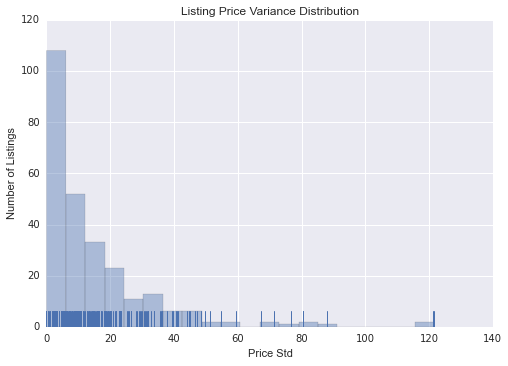

In [72]:
# print parsed_calendars
# print find_orphans(parsed_calendars, 3)
listing_var = listings_price_var(calendars)
# plt.hist(listing_var.values())
sns.distplot(listing_var.values(), bins=20, kde=False, rug=True);
sns.axlabel('Price Std', 'Number of Listings')
sns.plt.title('Listing Price Variance Distribution')



## Find the distribution of orphan's day

In [89]:
Orphans_dict = defaultdict(int)
Orphans_dict['b'] += 1
Orphans_dict.keys()

['b']

In [101]:
num_1d = 0
num_2d = 0
num_3d = 0

Orphans_dict = defaultdict(int)
for i in parsed_calendars.keys():
    one = find_orphans(parsed_calendars[i], 1)
    two = find_orphans(parsed_calendars[i], 2)
    three = find_orphans(parsed_calendars[i], 3)
    
    num_1d += len(one)
    num_2d += len(two)
    num_3d += len(three)
    
    for i in one['Start']:
        Orphans_dict[i] += 1
    for i in two['Start']:
        Orphans_dict[i] += 1
    for i in three['Start']:
        Orphans_dict[i] += 1
        
print num_1d, num_2d, num_3d

866 513 302


In [102]:
import collections
o_Orphans_dict = collections.OrderedDict(sorted(Orphans_dict.items()))
o_Orphans_dict.keys()

[u'2016-02-28',
 u'2016-02-29',
 u'2016-03-01',
 u'2016-03-02',
 u'2016-03-03',
 u'2016-03-04',
 u'2016-03-05',
 u'2016-03-06',
 u'2016-03-07',
 u'2016-03-08',
 u'2016-03-09',
 u'2016-03-10',
 u'2016-03-11',
 u'2016-03-12',
 u'2016-03-13',
 u'2016-03-14',
 u'2016-03-15',
 u'2016-03-16',
 u'2016-03-17',
 u'2016-03-18',
 u'2016-03-19',
 u'2016-03-20',
 u'2016-03-21',
 u'2016-03-22',
 u'2016-03-23',
 u'2016-03-24',
 u'2016-03-25',
 u'2016-03-26',
 u'2016-03-27',
 u'2016-03-28',
 u'2016-03-29',
 u'2016-03-30',
 u'2016-03-31',
 u'2016-04-01',
 u'2016-04-02',
 u'2016-04-03',
 u'2016-04-04',
 u'2016-04-05',
 u'2016-04-06',
 u'2016-04-07',
 u'2016-04-08',
 u'2016-04-09',
 u'2016-04-10',
 u'2016-04-11',
 u'2016-04-12',
 u'2016-04-13',
 u'2016-04-14',
 u'2016-04-15',
 u'2016-04-16',
 u'2016-04-17',
 u'2016-04-18',
 u'2016-04-19',
 u'2016-04-20',
 u'2016-04-21',
 u'2016-04-22',
 u'2016-04-23',
 u'2016-04-24',
 u'2016-04-25',
 u'2016-04-26',
 u'2016-04-27',
 u'2016-04-28',
 u'2016-04-29',
 u'2016-

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

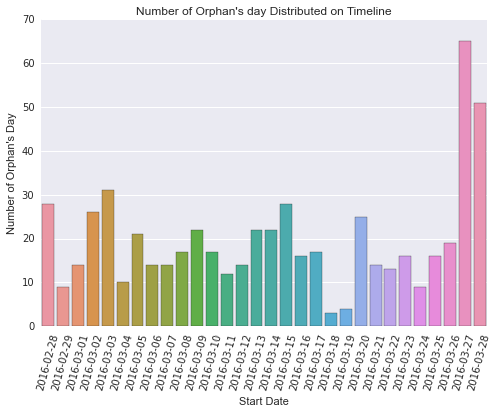

In [126]:
sns.barplot(o_Orphans_dict.keys()[:30], o_Orphans_dict.values()[:30])
sns.plt.title('Number of Orphan\'s day Distributed on Timeline' )
sns.axlabel("Start Date","Number of Orphan's Day")
plt.xticks(rotation=75)


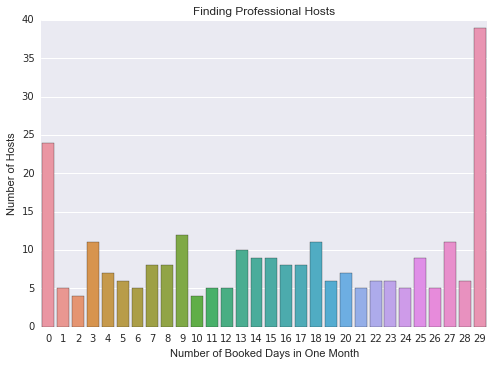

In [130]:
y = [24, 5, 4, 11, 7, 6, 5, 8, 8, 12, 4, 5, 5, 10, 9, 9, 8, 8, 11, 6, 7, 5, 6, 6, 5, 9, 5, 11, 6, 39]
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
sns.barplot(x, y)
sns.plt.title('Finding Professional Hosts' )
sns.axlabel("Number of Booked Days in One Month","Number of Hosts")


## Finding Professional Host by Looking at Their Booking Rate